In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../../data/train_set.csv")
data

,mean_growth_PH,sequence
0,7.0,MKKRAHIISFILILALLFTGCSGNKENTSKEPVKETTEKGTGNIKT...
1,7.0,MGKGKRKKRIALYFKRAAVAMLVMVMLLQPIPGTAGSSVKSVEAAV...
2,7.0,MKVNNKNSARKLLSLFLGLVLIFSTLSFSNQAAAADKGTWAPNTTY...
3,7.0,MRKKVTAVLTALVLTVSSILANPFAYPDAVKADTEGNPAAASNSNG...
4,7.0,MKRQSRIISFLVAVIMIATVIMPATVVQANASGVFIRVNQVGYKPS...
...,...,...
104996,7.8,MPYRSNTYPRANRRSKSATFSTLLTILFIASHFAFGGIPASASMDG...
104997,7.8,MRMGKVEVSLVVVVGASMTALAVFGVLPKDPVPPAIAKATLWTPAP...
104998,7.8,MTTTLPTPHRFTGLALSAALATTTVLTLSPSAVLAVPAGGYGDLVE...
104999,7.8,MRDFQAPGRSAVLATNGMCATSHPLAAQAAIDILKRGGNAMDAAIA...


In [4]:
CLUSTER_FILE = "../clustering/clusters/ident90"

with open(CLUSTER_FILE, "r") as f:
    lines = f.readlines()

representative = set(x.split()[1] for x in lines[::2])
data["representative"] = ("Seq" + data.index.astype(str)).isin(representative)
data.representative.sum()

28341

In [8]:
data["is7"] = data.mean_growth_PH == 7

In [9]:
data

,mean_growth_PH,sequence,representative,is7
0,7.0,MKKRAHIISFILILALLFTGCSGNKENTSKEPVKETTEKGTGNIKT...,True,True
1,7.0,MGKGKRKKRIALYFKRAAVAMLVMVMLLQPIPGTAGSSVKSVEAAV...,True,True
2,7.0,MKVNNKNSARKLLSLFLGLVLIFSTLSFSNQAAAADKGTWAPNTTY...,True,True
3,7.0,MRKKVTAVLTALVLTVSSILANPFAYPDAVKADTEGNPAAASNSNG...,True,True
4,7.0,MKRQSRIISFLVAVIMIATVIMPATVVQANASGVFIRVNQVGYKPS...,True,True
...,...,...,...,...
104996,7.8,MPYRSNTYPRANRRSKSATFSTLLTILFIASHFAFGGIPASASMDG...,True,False
104997,7.8,MRMGKVEVSLVVVVGASMTALAVFGVLPKDPVPPAIAKATLWTPAP...,True,False
104998,7.8,MTTTLPTPHRFTGLALSAALATTTVLTLSPSAVLAVPAGGYGDLVE...,True,False
104999,7.8,MRDFQAPGRSAVLATNGMCATSHPLAAQAAIDILKRGGNAMDAAIA...,True,False


In [11]:
X, y = train_test_split(data, test_size = 0.2, random_state = 31415,
                        stratify = data[["is7", "representative"]])

In [14]:
X.representative.sum() / len(X), y.representative.sum() / len(y)

(0.2699166666666667, 0.26989190990905193)

In [15]:
X.is7.sum() / len(X), y.is7.sum() / len(y)

(0.6646666666666666, 0.6646826341602781)

<AxesSubplot:>

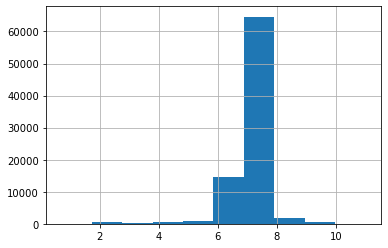

In [16]:
X.mean_growth_PH.hist()

<AxesSubplot:>

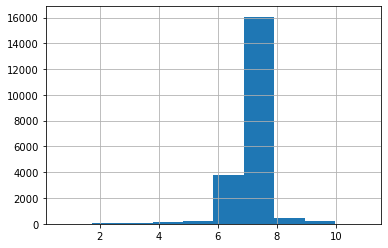

In [17]:
y.mean_growth_PH.hist()

In [20]:
X.to_csv("../train.csv")
y.to_csv("../valid.csv")